In [50]:
from matplotlib import pylab as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from scipy import io as sio

%matplotlib inline

In [51]:
mat = sio.loadmat('./data/ex6data2.mat')
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [52]:
X = mat.get('X')
Y = mat.get('y')

print('X:', X.shape)
print('Y:', Y.shape)

X: (863, 2)
Y: (863, 1)


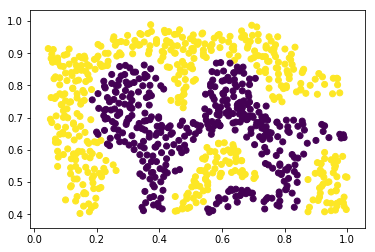

In [54]:
plt.scatter(X[:, 0], X[:, 1], c=Y)

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [56]:
X_scaler = StandardScaler()
Y_scaler = StandardScaler()

X_train_norm = X_scaler.fit_transform(X_train)
X_test_norm = X_scaler.transform(X_test)

In [101]:
svm = SVC(C=100, gamma=100, probability=True)
svm.fit(X_train_norm, Y_train)
svm.score(X_train_norm, Y_train)

/Users/zhangshulin_work/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.0

In [102]:
cross_svm = SVC(C=100, gamma=100, probability=True)
cross_val_score(cross_svm, X_train, Y_train.reshape(-1,), cv=5)

array([ 0.99280576,  0.98550725,  1.        ,  1.        ,  0.97080292])

In [103]:
svm.score(X_test_norm, Y_test)

0.9942196531791907

In [114]:
probilities = svm.predict_proba(X_scaler.transform(X))[:, 0]

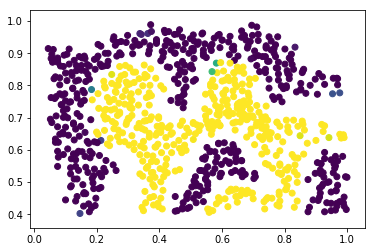

In [115]:
plt.scatter(X[:, 0], X[:, 1], c=probilities)